# User Behavioral Segmentation

## Problem Statement

A mobile apps company* wants to determine which of their users are most likely to "convert" (to start generating revenue), so that a targeted promotion is offered to these users. 

Current data show that only a small percentage of users have converted since installing their app. The available data includes user data, sessions data, spending data and revenue data. We need to use the available data to determine which of the non-revenue users are most likely to convert.

This is a user behavioral segmentation problem and we use KMeans to determine which of the non-converted users have the most overlap of common characteristics with the already converted users.

(*) The name of the company is kept private for a number of reasons and is not essential in any way for this project.

### 1. Import Data

In [1]:
# import necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.5)

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

- Read user data

In [2]:
df_user = pd.read_csv('data_users.csv')
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_ID        22576 non-null  int64 
 1   Install_Date   22576 non-null  object
 2   Language       22576 non-null  object
 3   Country        22564 non-null  object
 4   Mobile_Device  22576 non-null  object
dtypes: int64(1), object(4)
memory usage: 882.0+ KB


In [3]:
df_user.head(10)

,User_ID,Install_Date,Language,Country,Mobile_Device
0,0,2020-04-01,en,US,"iPhone4,1"
1,1,2020-04-01,en,IN,"iPod5,1"
2,2,2020-04-06,en,US,"iPod7,1"
3,3,2020-04-03,nb,NO,"iPhone8,1"
4,4,2020-04-03,en,GB,"iPhone5,4"
5,5,2020-04-07,en,US,"iPhone5,3"
6,6,2020-04-06,en,US,"iPhone3,1"
7,7,2020-04-06,en,US,"iPhone6,1"
8,8,2020-04-03,en,US,"iPhone4,1"
9,9,2020-04-04,tr,TR,"iPhone6,2"


- Read spending data

In [4]:
df_spend = pd.read_csv('data_spending.csv')
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107764 entries, 0 to 107763
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   User_ID          107764 non-null  int64 
 1   Time_of_Session  107764 non-null  object
 2   Spending         106420 non-null  object
 3   Amount           107764 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [5]:
df_spend.head(10)

,User_ID,Time_of_Session,Spending,Amount
0,9829,2020-04-01 03:03:04,PointsEarned,-22
1,13757,2020-04-01 03:35:53,PointsEarned,-22
2,13757,2020-04-01 03:52:10,PointsEarned,-22
3,10009,2020-04-01 04:10:00,PointsEarned,-22
4,10009,2020-04-01 04:26:46,PointsEarned,-22
5,14151,2020-04-01 06:38:33,PointsEarned,-22
6,10799,2020-04-01 08:08:26,PointsEarned,-22
7,18706,2020-04-01 08:48:40,PointsEarned,-22
8,22489,2020-04-01 09:43:01,PointsEarned,-22
9,22489,2020-04-01 09:54:14,PointsEarned,-22


- Read sessions data

In [6]:
df_sess = pd.read_csv('data_sessions.csv')
df_sess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722955 entries, 0 to 722954
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   User_ID          722955 non-null  int64 
 1   Time_of_Session  722955 non-null  object
 2   Session_Number   722955 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.5+ MB


In [7]:
df_sess.head(10)

,User_ID,Time_of_Session,Session_Number
0,14067,2020-04-01 00:06:50,1
1,14067,2020-04-01 00:22:27,2
2,16275,2020-04-01 01:23:03,1
3,16275,2020-04-01 01:31:16,2
4,16275,2020-04-01 01:47:22,3
5,16275,2020-04-01 01:49:31,4
6,16275,2020-04-01 02:06:51,4
7,16275,2020-04-01 03:10:40,5
8,265,2020-04-01 03:55:56,1
9,12244,2020-04-01 05:23:50,1


- Read revenue data

In [8]:
df_rev = pd.read_csv('data_revenue.csv')
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          6685 non-null   int64 
 1   Time_of_Session  6685 non-null   object
 2   Purchase         6685 non-null   object
 3   Revenue          6685 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 209.0+ KB


In [9]:
df_rev.head(10)

,User_ID,Time_of_Session,Purchase,Revenue
0,7480,2020-04-04 08:15:49,Points,760
1,7480,2020-04-04 08:24:15,Upgrade,760
2,7480,2020-04-04 22:49:08,Points,410
3,2466,2020-04-06 00:16:48,Points,760
4,22001,2020-04-06 09:13:45,Points,760
5,19008,2020-04-06 09:44:30,Points,760
6,22001,2020-04-07 09:36:37,Points,760
7,9487,2020-04-07 15:57:34,Points,760
8,9487,2020-04-07 15:57:34,Points,760
9,11963,2020-04-07 20:51:03,Upgrade,760


### 2. Data Processing

- **Create working data set from users data**

In [10]:
df_user.head()

,User_ID,Install_Date,Language,Country,Mobile_Device
0,0,2020-04-01,en,US,"iPhone4,1"
1,1,2020-04-01,en,IN,"iPod5,1"
2,2,2020-04-06,en,US,"iPod7,1"
3,3,2020-04-03,nb,NO,"iPhone8,1"
4,4,2020-04-03,en,GB,"iPhone5,4"


In [11]:
df_user.columns

Index(['User_ID', 'Install_Date', 'Language', 'Country', 'Mobile_Device'], dtype='object')

In [12]:
# create new data and keep user_id and install date --> use copy so that not to affect original data

data = df_user[['User_ID', 'Install_Date']].copy()

data.head()

,User_ID,Install_Date
0,0,2020-04-01
1,1,2020-04-01
2,2,2020-04-06
3,3,2020-04-03
4,4,2020-04-03


- **Create new variable, 'User_Group', to denote:**
    - Users 1 - not converted (do not generate revenue)
    - Users 2 - converted (generate revenue) --> these are the users in revenue data

In [13]:
# initialize with value of 1
data['User_Group'] = 1

data.head()

,User_ID,Install_Date,User_Group
0,0,2020-04-01,1
1,1,2020-04-01,1
2,2,2020-04-06,1
3,3,2020-04-03,1
4,4,2020-04-03,1


In [14]:
# examine df_rev and determine which users are in Group 2
df_rev.head(10)

,User_ID,Time_of_Session,Purchase,Revenue
0,7480,2020-04-04 08:15:49,Points,760
1,7480,2020-04-04 08:24:15,Upgrade,760
2,7480,2020-04-04 22:49:08,Points,410
3,2466,2020-04-06 00:16:48,Points,760
4,22001,2020-04-06 09:13:45,Points,760
5,19008,2020-04-06 09:44:30,Points,760
6,22001,2020-04-07 09:36:37,Points,760
7,9487,2020-04-07 15:57:34,Points,760
8,9487,2020-04-07 15:57:34,Points,760
9,11963,2020-04-07 20:51:03,Upgrade,760


In [15]:
# verify that all entries have Revenue values different from 0
print('Revenue total number of entries: ', len(df_rev))
print('Revenue number of entries with rev = 0: ', len(df_rev[df_rev['Revenue'] == 0]))

Revenue total number of entries:  6685
Revenue number of entries with rev = 0:  0


In [16]:
# create a list of user_id for users in Revenue --> these are our Group 2 users

user_2 = list(df_rev['User_ID'].value_counts().index)

print(user_2[:10])

[13523, 9487, 12592, 20401, 7645, 15446, 8304, 21755, 15404, 1643]


In [17]:
# apply a filter to assign value of 2 in data 'user_group' corresponding to 'user_2' list
mask_user2 = data['User_ID'].isin(user_2)

data['User_Group'][mask_user2] = 2

In [18]:
# examine result

data.head(10)

,User_ID,Install_Date,User_Group
0,0,2020-04-01,1
1,1,2020-04-01,1
2,2,2020-04-06,2
3,3,2020-04-03,1
4,4,2020-04-03,1
5,5,2020-04-07,1
6,6,2020-04-06,1
7,7,2020-04-06,1
8,8,2020-04-03,1
9,9,2020-04-04,1


Among the first ten users only user 2 is in Group 2.

- **Create new variables:** 
    - 'Active_Period' (the period between first and last user session in hrs); 
    - 'N_Sessions' (number of user sessions)
    - Fill with the appropriate values using the information in df_sess

In [19]:
# create these two new columns with initial values of 0

data['Active_Period'] = 0
data['N_Sessions'] = 0

data.head()

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions
0,0,2020-04-01,1,0,0
1,1,2020-04-01,1,0,0
2,2,2020-04-06,2,0,0
3,3,2020-04-03,1,0,0
4,4,2020-04-03,1,0,0


In [20]:
# examine again df_sess

df_sess.head()

,User_ID,Time_of_Session,Session_Number
0,14067,2020-04-01 00:06:50,1
1,14067,2020-04-01 00:22:27,2
2,16275,2020-04-01 01:23:03,1
3,16275,2020-04-01 01:31:16,2
4,16275,2020-04-01 01:47:22,3


In [21]:
# check 'Time_of_Session' data type

print(type(df_sess['Time_of_Session'][0]))

<class 'str'>


In [22]:
# convert to Timestamp and verify

df_sess['Time_of_Session'] = pd.to_datetime(df_sess['Time_of_Session'])

print(type(df_sess['Time_of_Session'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
# create a list of unique user_id which occur in df_sess

user_sess = list(df_sess['User_ID'].value_counts().index)

print(user_sess[:10])

[599, 14158, 20711, 13383, 8705, 20964, 4458, 3039, 21320, 16126]


In [24]:
# fill the corresponding values in data 'active_period' and 'n_sessions' using df_sess
# if this step is going to be repeated multiple times it is best to define a function for performing this operation
# here we will perform it once, so we will execute the code directly

for i in range(len(data)):
    tmp_id = data['User_ID'][i]
    
    # select the session subset corresponding to user_id
    if tmp_id in user_sess:
        tmp_sess = df_sess[df_sess['User_ID'] == tmp_id]
        
        # fill data values only for sessions with non-zero length
        if len(tmp_sess) != 0:
            # obtain the active period in hrs and the number of sessions for the user
            delta_t = (tmp_sess['Time_of_Session'].iloc[-1] - tmp_sess['Time_of_Session'].iloc[0]).total_seconds() / 3600
            n_sess = tmp_sess['Session_Number'].iloc[-1]
            
            # fill the corresponding values in df_main
            data['Active_Period'][i] = delta_t
            data['N_Sessions'][i] = n_sess

In [25]:
# examine results

data.head(10)

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions
0,0,2020-04-01,1,89,12
1,1,2020-04-01,1,511,33
2,2,2020-04-06,2,1308,38
3,3,2020-04-03,1,2,3
4,4,2020-04-03,1,74,3
5,5,2020-04-07,1,126,11
6,6,2020-04-06,1,25,5
7,7,2020-04-06,1,553,44
8,8,2020-04-03,1,626,29
9,9,2020-04-04,1,0,6


The resulting values for the two new features 'Active_Period' and 'N_Sessions' appear reasonable. It is interesting, though, to examine the session history of user with User_ID = 9.

In [26]:
# examine session history for user_id = 9

df_sess[df_sess['User_ID'] == 9]

,User_ID,Time_of_Session,Session_Number
158072,9,2020-04-04 11:13:26,1
158076,9,2020-04-04 11:28:31,2
158078,9,2020-04-04 11:32:41,3
158079,9,2020-04-04 11:33:03,4
158085,9,2020-04-04 11:41:56,5
158099,9,2020-04-04 12:05:50,6


Indeed, user 9 has logged six sessions within less than 1 hour. We could, perhaps, examine 'active_period' values of 0 and assign 0 or 1 depending on the real time length. However, gauging from the values we observe the difference between 0 and 1 is not significant and should not affect our model results.

- **Create new data variables corresponding to the different types of spending and fill with the appropriate values using the information in df_spend.**

In [27]:
# examine df_spend

df_spend.head()

,User_ID,Time_of_Session,Spending,Amount
0,9829,2020-04-01 03:03:04,PointsEarned,-22
1,13757,2020-04-01 03:35:53,PointsEarned,-22
2,13757,2020-04-01 03:52:10,PointsEarned,-22
3,10009,2020-04-01 04:10:00,PointsEarned,-22
4,10009,2020-04-01 04:26:46,PointsEarned,-22


In [28]:
# examine some other entries in df_spend

df_spend.iloc[25:35, :]

,User_ID,Time_of_Session,Spending,Amount
25,2709,2020-04-01 19:27:24,PointsEarned,-22
26,866,2020-04-01 20:21:48,PointsEarned,-22
27,5704,2020-04-01 21:16:37,PointsEarned,-22
28,19732,2020-04-01 21:21:41,PointsEarned,-22
29,19732,2020-04-01 21:21:41,PointsEarned,-22
30,5704,2020-04-01 21:40:52,App,-73
31,5704,2020-04-01 21:40:55,Premium,35
32,17754,2020-04-02 00:22:34,PointsEarned,-22
33,13592,2020-04-02 00:35:05,PointsEarned,-22
34,17754,2020-04-02 01:08:50,PointsEarned,-22


In [29]:
# determine the spending types from df_spend

print(round(df_spend['Spending'].value_counts(normalize = True) * 100, 2))

PointsEarned    81.97
Premium         13.37
App              4.62
ValuePack        0.04
Name: Spending, dtype: float64


In [30]:
# create a list of these spending types

type_spend = list(df_spend['Spending'].value_counts().index)
print(type_spend)

['PointsEarned', 'Premium', 'App', 'ValuePack']


In [31]:
# create corresponding spending columns in data with intial values of 0

columns_spend = ['Spend_Points', 'Spend_Premium', 'Spend_App', 'Spend_VP']
data[columns_spend] = 0

data.head()

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
0,0,2020-04-01,1,89,12,0,0,0,0
1,1,2020-04-01,1,511,33,0,0,0,0
2,2,2020-04-06,2,1308,38,0,0,0,0
3,3,2020-04-03,1,2,3,0,0,0,0
4,4,2020-04-03,1,74,3,0,0,0,0


In [32]:
# check the indexing of the new columns --> will use this information when filling the values in the corresponding columns 

data.iloc[:1, 5:9]

,Spend_Points,Spend_Premium,Spend_App,Spend_VP
0,0,0,0,0


In [33]:
# create a list of user_id in df_spend

user_spend = list(df_spend['User_ID'].value_counts().index)

print(user_spend[:10])

[9487, 13523, 10937, 12486, 20198, 3041, 12592, 10329, 21409, 2763]


In [34]:
# fill the corresponding values in data using df_spend

# specify index of first spending column in data
j_s = 5

for i in range(len(data)):
    tmp_id = data['User_ID'][i]
    
    # select the spend subset corresponding to user_id
    if tmp_id in user_spend:
        tmp_spend = df_spend[df_spend['User_ID'] == tmp_id]
        
        # fill data values only for spending with non-zero length
        if len(tmp_spend) != 0:
            
            # obtain the sum of the different types of spending for that user
            for j in range(len(type_spend)):
                tmp_type = type_spend[j]
                data.iloc[tmp_id, j_s + j] = sum(tmp_spend[tmp_spend['Spending'] == tmp_type]['Amount'])

In [35]:
# examine results

data.head(10)

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
0,0,2020-04-01,1,89,12,-22,0,0,0
1,1,2020-04-01,1,511,33,-44,0,0,0
2,2,2020-04-06,2,1308,38,-44,74,-73,0
3,3,2020-04-03,1,2,3,-22,0,0,0
4,4,2020-04-03,1,74,3,-22,0,0,0
5,5,2020-04-07,1,126,11,-22,0,0,0
6,6,2020-04-06,1,25,5,-22,0,0,0
7,7,2020-04-06,1,553,44,-22,0,0,0
8,8,2020-04-03,1,626,29,-22,0,0,0
9,9,2020-04-04,1,0,6,0,0,0,0


Let's verify the results by comparing the values in data with those in df_spend for user 1 and user 2.

In [36]:
# df_spend for user_id = 1

df_spend[df_spend['User_ID'] == 1]

,User_ID,Time_of_Session,Spending,Amount
43030,1,2020-04-01 20:07:58,PointsEarned,-22
43458,1,2020-04-02 21:12:03,PointsEarned,-22


In [37]:
# data for user_id = 1

data[data['User_ID'] == 1]

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
1,1,2020-04-01,1,511,33,-44,0,0,0


In [38]:
# df_spend for user_id = 2

df_spend[df_spend['User_ID'] == 2]

,User_ID,Time_of_Session,Spending,Amount
37957,2,2020-04-06 10:09:07,PointsEarned,-22
38225,2,2020-04-07 11:31:43,PointsEarned,-22
38226,2,2020-04-07 11:50:37,App,-73
38227,2,2020-04-07 11:50:42,Premium,49
38229,2,2020-04-07 12:31:33,Premium,25
60138,2,2020-04-26 10:50:46,PointsEarned,0
67873,2,2020-04-30 21:01:28,PointsEarned,0


In [39]:
# data for user_id = 2

data[data['User_ID'] == 2]

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
2,2,2020-04-06,2,1308,38,-44,74,-73,0


Results for spending in data match the values in df_spend. With this we conclude building our working/modeling data set.

### 3. EDA

In [40]:
# preview data

data.head(10)

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
0,0,2020-04-01,1,89,12,-22,0,0,0
1,1,2020-04-01,1,511,33,-44,0,0,0
2,2,2020-04-06,2,1308,38,-44,74,-73,0
3,3,2020-04-03,1,2,3,-22,0,0,0
4,4,2020-04-03,1,74,3,-22,0,0,0
5,5,2020-04-07,1,126,11,-22,0,0,0
6,6,2020-04-06,1,25,5,-22,0,0,0
7,7,2020-04-06,1,553,44,-22,0,0,0
8,8,2020-04-03,1,626,29,-22,0,0,0
9,9,2020-04-04,1,0,6,0,0,0,0


- **First Level of Examination:**
    - Establish the percentage of users in Groups 1 and 2, respectively.

In [41]:
# obtain the user_group count in percenages from total number of users

count_group = data['User_Group'].value_counts(normalize = True) * 100

print(round(count_group, 1))

1    93.2
2     6.8
Name: User_Group, dtype: float64


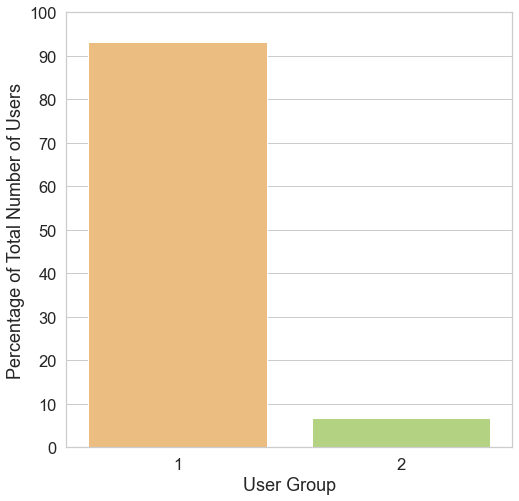

In [42]:
# visualize with a bar plot

plt.figure(figsize = (8, 8))
sns.barplot(count_group.index, count_group.values, palette = 'RdYlGn')
plt.xlabel('User Group')
plt.ylabel('Percentage of Total Number of Users')
plt.yticks(np.arange(0, 110, 10))

plt.show()

Users in Group 1 (non-revenue) are approximately 93% of all users. Users in Group 2 (revenue) are only about 7% of all users.

- **Second Level of Examination:**
    - Examine the value distributions of the relevant features and look for differences and similarities between users from Group 1 and Group 2 .
    - For visualization use scatter and box plots.

In [43]:
# define scatter plot function

feat_name = 'Active_Period'
user_type = [1, 2]

# figure and plot parameters
fig_size_x = 10
fig_size_y = 8

# set y-scale limits to have a handle in case we need to cut off some extreme outliers
y_min = -100
y_max = 1500

legend_box_x = 1.1 
legend_box_y = 0.9

alpha_val = 0.5

def plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val):
    # data points for users in Group 1
    x1 = data[data['User_Group'] == user_type[0]]['User_ID']
    y1 = data[data['User_Group'] == user_type[0]][feat_name]
    
    # data points for users in Group 2
    x2 = data[data['User_Group'] == user_type[1]]['User_ID']
    y2 = data[data['User_Group'] == user_type[1]][feat_name]
    
    plt.figure(figsize = (fig_size_x, fig_size_y))
    plt.scatter(x1, y1, c = 'r', alpha = alpha_val, label = 'Group 1')
    plt.scatter(x2, y2, c = 'g', alpha = alpha_val, label = 'Group 2')
    plt.ylim(y_min, y_max)
    plt.xlabel('User ID')
    plt.ylabel(feat_name.upper())
    plt.title(feat_name.upper() + ' by User Type', pad = 15)
    plt.legend(bbox_to_anchor = (legend_box_x, legend_box_y))
    plt.show()

    - 'Active_Period'

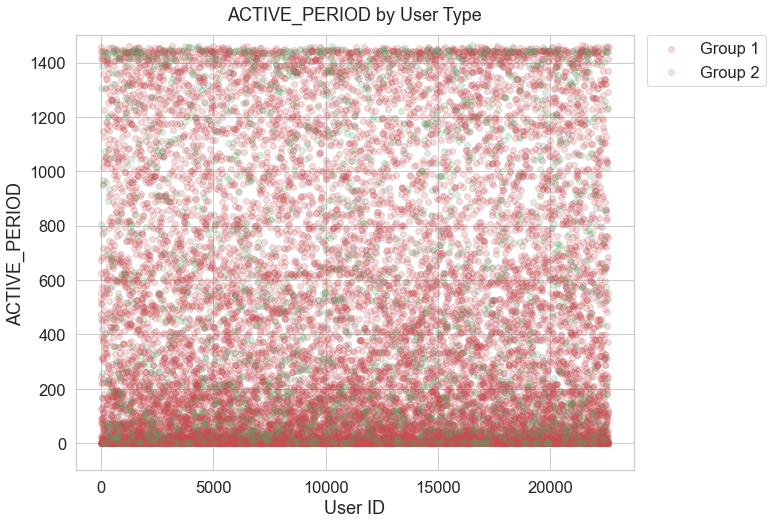

In [44]:
alpha_val = 0.2

y_min = -100
y_max = 1500

fig_size_x = 10
fig_size_y = 8

legend_box_x = 1.01
legend_box_y = 1.02

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

Clearly, there is no visible differentiation between the two different groups of users. That's why we will use box plot here.

In [45]:
# define a function to create boxplots for different features vs user_group

def plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max):
    
    plt.figure(figsize = (fig_size_x, fig_size_y))
    sns.boxplot(x = data['User_Group'], y = data[feat_name], palette = 'RdYlGn')
    plt.ylim(y_min, y_max)
    plt.xlabel('User Group')
    plt.ylabel(feat_name.upper())
    plt.title('Boxplot of ' + feat_name.upper() + ' vs. User Group', pad = 15)
    plt.show()

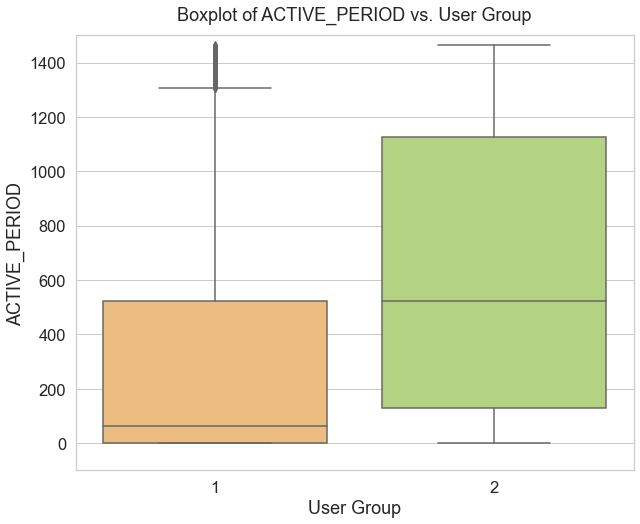

In [46]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

The boxplot of the 'active_period' values shows a different value spread for the two groups with Group 2 having larger values overall. As the plot indicates, however, it is clear that there are some users from Group 1 with long active_period as well (the outliers for Group 1).

We will repeat the same steps for the remaining features of interest.

    - 'N_Sessions'

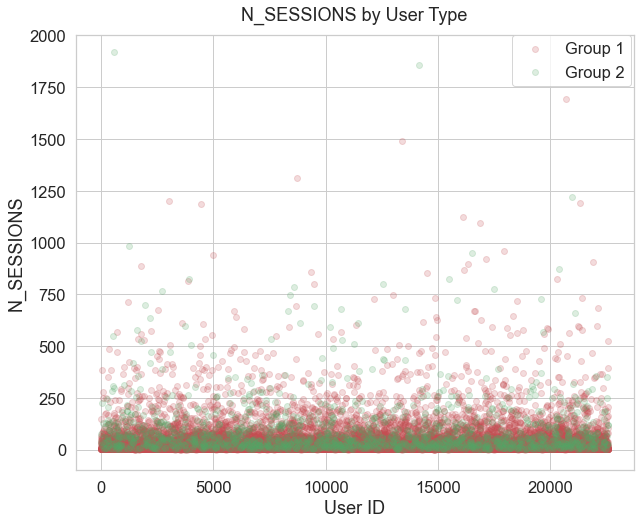

In [47]:
feat_name = 'N_Sessions'

y_min = -100
y_max = 2000

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

As before, the scatter plot doesn't provide a clear picture. That's why we will plot the box plot here, as well.

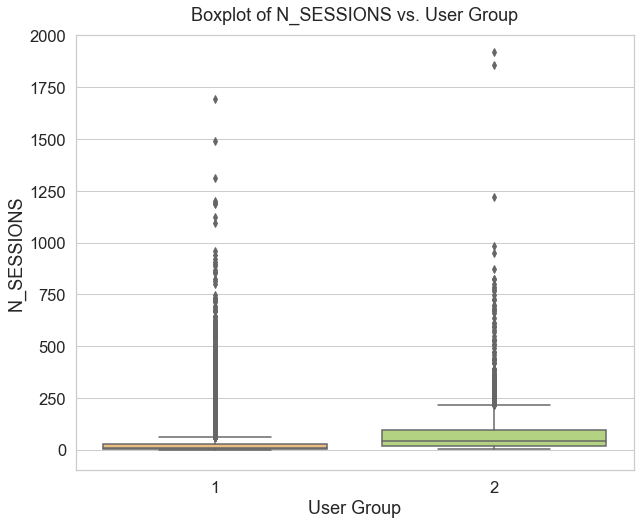

In [48]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

Here, again we can see the difference in the value spread for the number of sessions between the two groups with Group 2 having an overall higher number. One thing that we would like to note is that while the median values for the two groups are in the tens, there are users in both groups with the number of sessions in the hundreds and in the thousands!

    - 'Spend_Points'

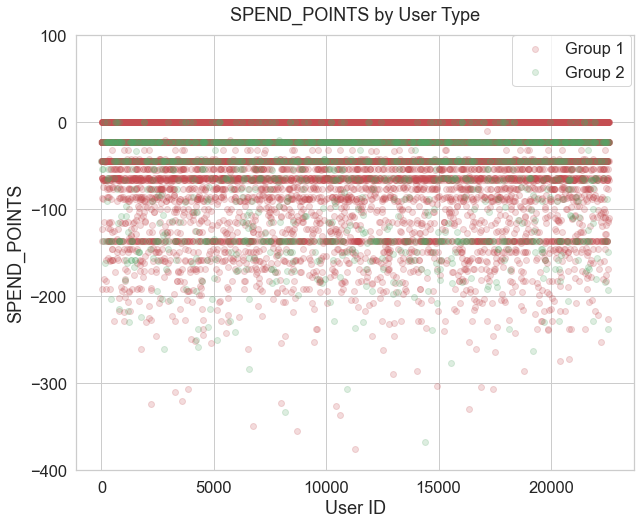

In [49]:
feat_name = 'Spend_Points'

y_min = -400
y_max = 100

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

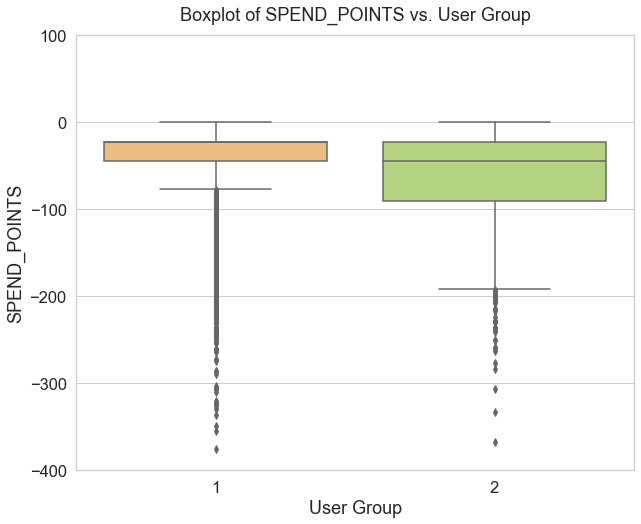

In [50]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

Here too, we see the trend that Group 2 shows larger values in magnitude.

    - 'Spend_Premium'

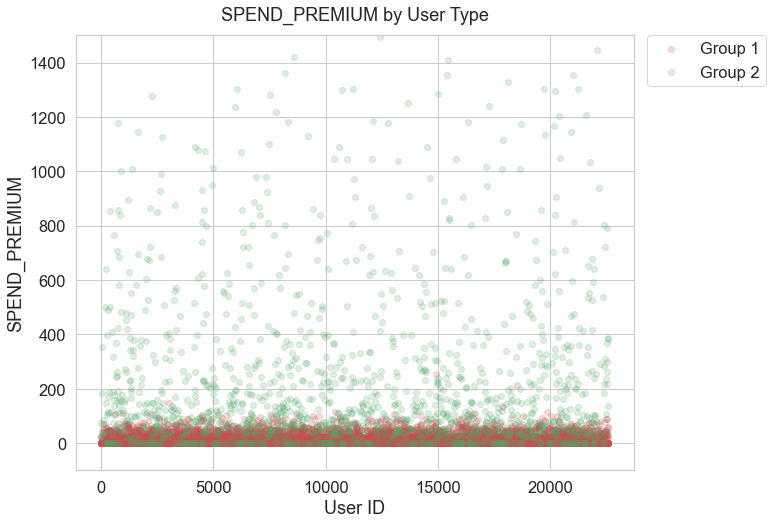

In [51]:
feat_name = 'Spend_Premium'

y_min = -100
y_max = 1500

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

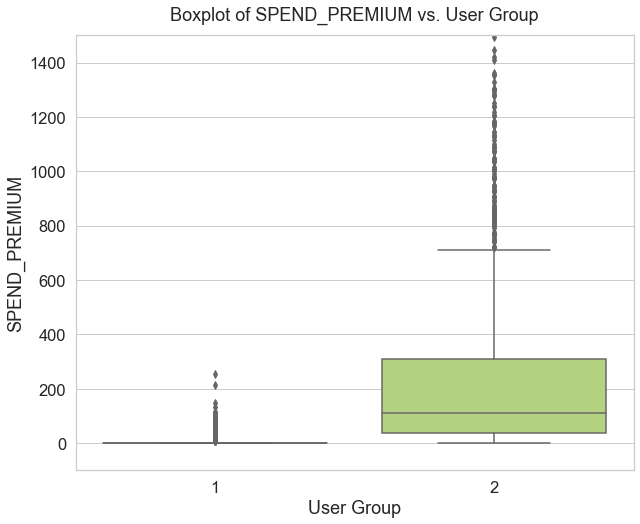

In [52]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

Here, we observe perhaps the most dramatic difference so far between the two groups with Group 2 outspending Group 1 by a large margin.

    - 'Spend_App'

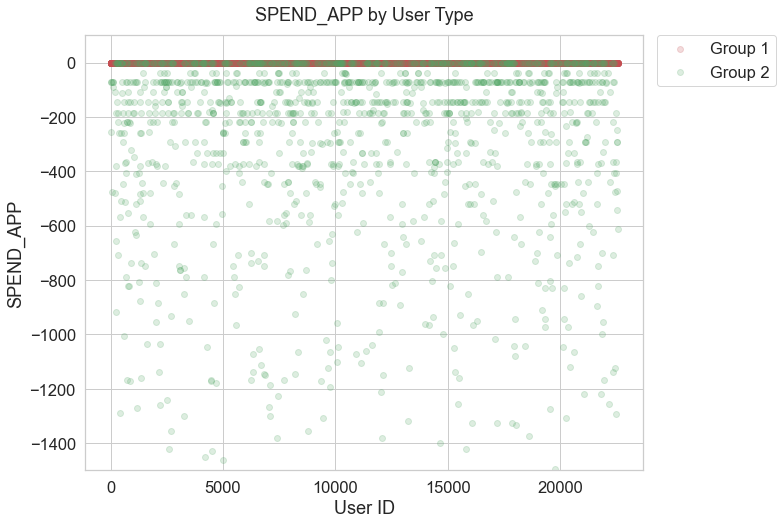

In [53]:
feat_name = 'Spend_App'

y_min = -1500
y_max = 100

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

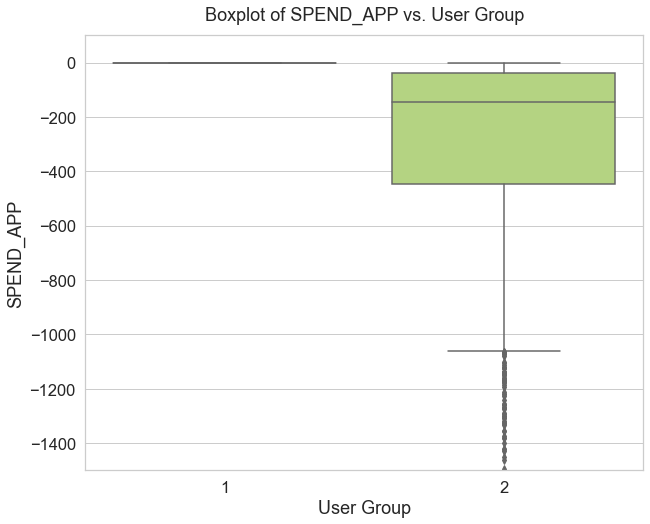

In [54]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

The box plot for the App spending shows that Group 1 users have 0 spendings. Because of non-existing App spending for Group 1 users we cannot use this feature in our clustering model. 

    - 'Spend_VP'

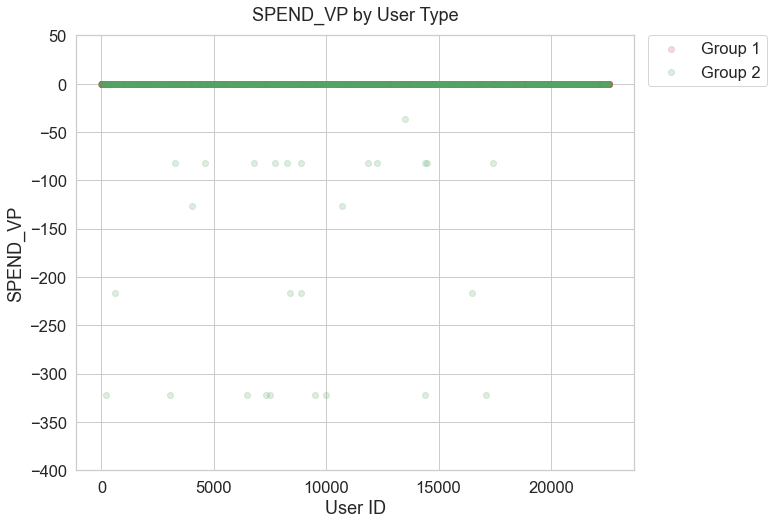

In [55]:
feat_name = 'Spend_VP'

y_min = -400
y_max = 50

plot_scatter_feat(data, feat_name, user_type, fig_size_x, fig_size_y, y_min, y_max, legend_box_x, legend_box_y, alpha_val)

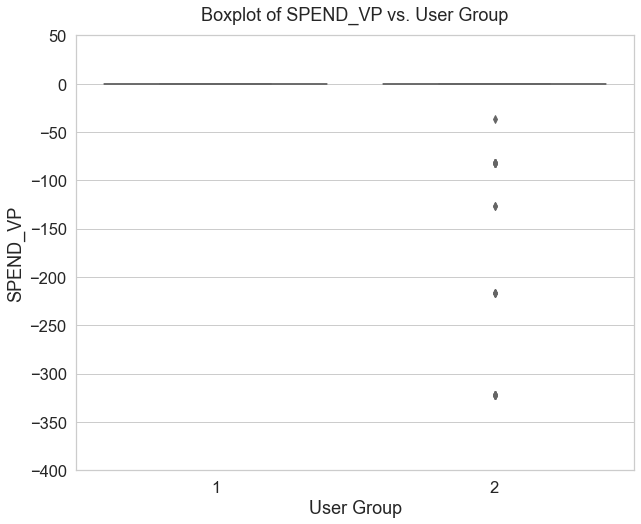

In [56]:
plot_box_feat(data, feat_name, fig_size_x, fig_size_y, y_min, y_max)

This feature also appears of little use for modeling since most of the values are 0.

- **Third Level of Examination:**
    - Examine for correlations between the two most likely correlated features - 'Active_Period' and 'N_Session'
    - The motivation is to examine for type of correlation for some Users 1 similar to that observed for Users 2 

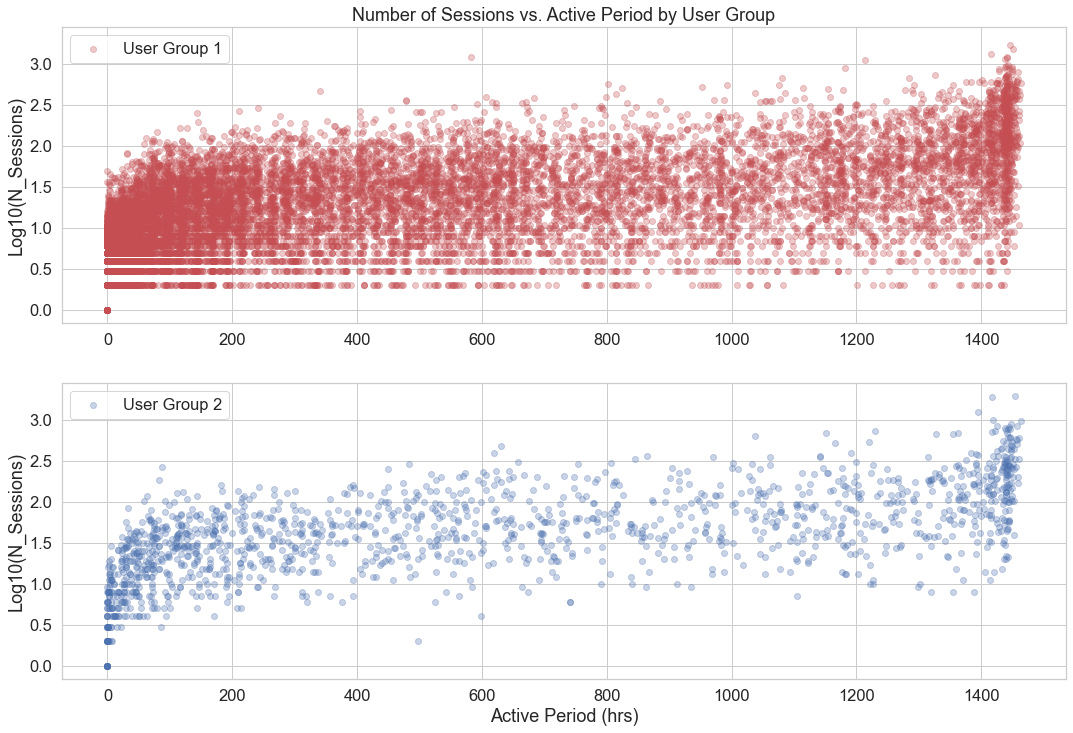

In [57]:
# scatter plot of 'N_Sessions' vs 'Active_Period'
x1 = data[data['User_Group'] == 1]['Active_Period']
y1 = np.log10(data[data['User_Group'] == 1]['N_Sessions'])

x2 = data[data['User_Group'] == 2]['Active_Period']
y2 = np.log10(data[data['User_Group'] == 2]['N_Sessions'])

fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharey = True)

axes[0].scatter(x1, y1, label = 'User Group 1', c = 'r', alpha = 0.3)
axes[0].set(ylabel = 'Log10(N_Sessions)')
axes[0].set(title = 'Number of Sessions vs. Active Period by User Group')
axes[0].legend()

axes[1].scatter(x2, y2, label = 'User Group 2', c = 'b', alpha = 0.3)
axes[1].set(xlabel = 'Active Period (hrs)')
axes[1].set(ylabel = 'Log10(N_Sessions)')
axes[1].legend()

plt.show()

**Main observations from plot:**
- There is no clear correlation between 'Active_Period' length and 'N_Sessions' values
- There is no clear differentiation in the behavior of Users 1 and Users 2
- In both groups, there is a clustering of users with small 'Active_Period' length, 0-200 hrs, and with large 'Active_Period' length, 1400-1500 hrs, with extremely wide range of number of sessions across the entire 'Active Period' range - recall that we use Log10(N_Sessions) here


With this we conclude the EDA section and proceed with data modeling.

### 4. Data Modeling

In the modeling process, we want to use all features that carry useful information about the users. From the EDA portion of the project, it appears that there are four such features: 'Active_Period', 'N_Sessions', 'Spend_Points', 'Spend_Premium'.

However, in a clustering problem one of the best ways to analyze the results and establish confidence in them is by visualizing the clusters and comparing the model results with the information we have - users belonging to Group 1 or Group 2. Since we have four distinct features, visualizing the clusters would not be possible. Therefore, first we will use PCA in order to reduce the number of features (hopefully to two). The resulting components from the PCA model will then be used with a K-means clustering model.

**Select a data set for modeling and data for examining the results**

In [58]:
data.head()

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP
0,0,2020-04-01,1,89,12,-22,0,0,0
1,1,2020-04-01,1,511,33,-44,0,0,0
2,2,2020-04-06,2,1308,38,-44,74,-73,0
3,3,2020-04-03,1,2,3,-22,0,0,0
4,4,2020-04-03,1,74,3,-22,0,0,0


In [59]:
data.columns

Index(['User_ID', 'Install_Date', 'User_Group', 'Active_Period', 'N_Sessions',
       'Spend_Points', 'Spend_Premium', 'Spend_App', 'Spend_VP'],
      dtype='object')

In [60]:
# create the set used for modeling and the set of current labels (User_Group)

# data for modeling
X = data[['Active_Period', 'N_Sessions', 'Spend_Points', 'Spend_Premium']]

# current labels (to be used for comparison)
y = data['User_Group']

In [61]:
# scale features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

**Applying PCA**

- First find the significance of the principal components after PCA in terms of percentage of captured variance.

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

pca.fit(X)

explained_var = pca.explained_variance_ratio_
explained_var

array([0.40810686, 0.24999812, 0.22181549, 0.12007952])

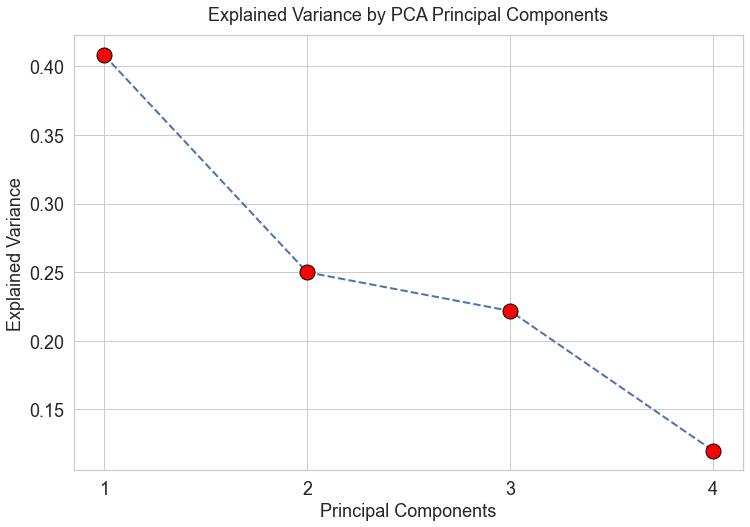

In [63]:
# visualize the Explained Variance by principal components

plt.figure(figsize = (12,8))

ax = plt.axes()
ax.tick_params(labelsize = 18)

plt.plot(np.arange(X.shape[1])+1, explained_var, 'b--', lw = 2, marker = 'o', ms = 15, mfc = 'red', mec = 'black')
plt.xticks(np.arange(X.shape[1])+1)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by PCA Principal Components', pad = 15)
plt.show()

From the results, we see that two principal components account for approximately 66% of the data variance, while three components account for about 88% of the variance. 

Ideally, for best results, we would use a PCA model with three components to transform the data for use with K-means. However, our focus is on explainability and trust in our final results. To achieve this, visualizing the model results is paramount. That's why we choose to use a PCA model with two principal components only.

- Apply PCA with two components

In [64]:
# apply PCA with 2 components and save transformed data as a new set of features, X_pca, to be used with K-means

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)
X_pca

array([[-0.59043614, -0.00920622],
       [ 0.18235648, -0.00794333],
       [ 1.56901873, -0.00587606],
       ...,
       [ 0.37512945, -0.0095218 ],
       [-0.8019857 , -0.00996719],
       [-0.80198611, -0.00988869]])

**Applying KMeans**

- Use elbow method to determine the optimal number of clusters

In [65]:
# use the elbow method to find the optimal number of clusters
# don't forget to use X_pca with K-means here!!!

from sklearn.cluster import KMeans

wcss = [] # Within Cluster Sum Squares (wcss)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

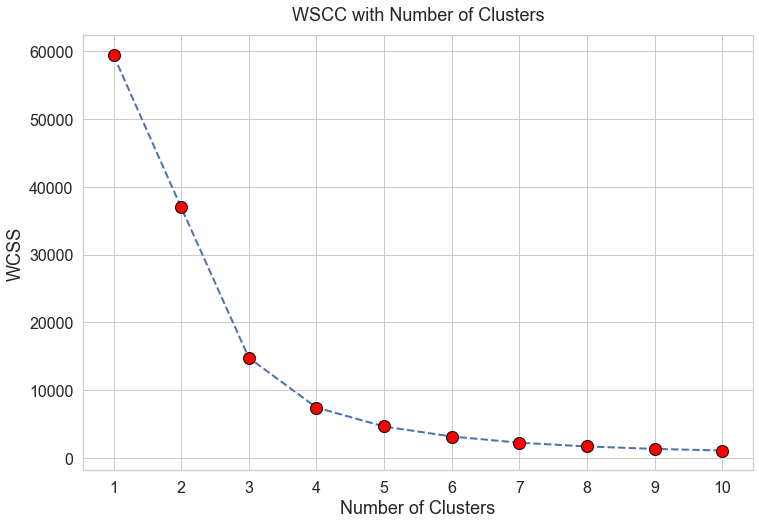

In [66]:
# plot result
plt.figure(figsize=(12,8)) 
plt.plot(range(1, 11), wcss, 'b--', lw = 2, marker = 'o', ms = 12, mfc = 'red', mec = 'black')
plt.xticks(np.arange(10)+1)
plt.title('WSCC with Number of Clusters', pad = 15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.tick_params(labelsize = 16)

plt.show()

It appears that the "bend" point is at n_clusters = 4 indicating that this value is the optimal number of clusters for the KMeans model.

However, we would like to examine how the user segmentation changes when the number of clusters is increased to 5 and 6.

In [67]:
# n_clusters = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
km_labels_4 = kmeans.fit_predict(X_pca)

In [68]:
# n_clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
km_labels_5 = kmeans.fit_predict(X_pca)

In [69]:
# n_clusters = 6
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
km_labels_6 = kmeans.fit_predict(X_pca)

- Compare the K-means results with the known data labels!

In [70]:
# define fuction to plot and compare clustering results
figsize_x = 16
figsize_y = 20

x_min = -2.5
x_max = 22.5
d_x = 2.5

y_min = -0.025
y_max = 0.20
d_y = 0.025

alpha_val = 0.2
marker_size = 10

def plot_compare_clusters(X_plt, y, km_labels_4, km_labels_5, km_labels_6, 
                          figsize_x, figsize_y, x_min, x_max, d_x, y_min, y_max, d_y,
                          alpha_val, marker_size, legend_box_x, legend_box_y):
    
    fig, axes = plt.subplots(4, 1, sharey=True, figsize=(figsize_x, figsize_y))

    # User Groups
    axes[0].scatter(X_plt[:, 0], X_plt[:, 1], c = y, 
                    alpha = alpha_val, cmap = 'rainbow_r', 
                    s = marker_size, label = 'User Groups')
    axes[0].set_title('KMeans Clustering Results', fontsize = 18, pad = 20)
    # axes[0].set_xlabel('Principal Component 1', fontsize = 16, labelpad = 15)
    axes[0].set_ylabel('Principal Component 2', fontsize = 16, labelpad = 15)
    axes[0].set_xlim(x_min, x_max)
    axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
    axes[0].set_ylim(y_min, y_max)
    axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
    axes[0].tick_params(labelsize = 14)
    axes[0].legend()
    axes[0].legend(bbox_to_anchor = (legend_box_x, legend_box_y))
    
    # KM with 4 clusters
    axes[1].scatter(X_plt[:, 0], X_plt[:, 1], c = km_labels_4, 
                    alpha = alpha_val, cmap = 'rainbow_r', 
                    s = marker_size, label = 'KMeans with 4 Clusters')
    axes[1].set_ylabel('Principal Component 2', fontsize = 16, labelpad = 15)
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
    axes[1].set_ylim(y_min, y_max)
    axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
    axes[1].tick_params(labelsize = 14)
    axes[1].legend()
    axes[1].legend(bbox_to_anchor = (legend_box_x, legend_box_y))

    # KM with 5 clusters
    axes[2].scatter(X_plt[:, 0], X_plt[:, 1], c = km_labels_5, 
                    alpha = alpha_val, cmap = 'rainbow_r', 
                    s = marker_size, label = 'KMeans with 5 Clusters')
    axes[2].set_ylabel('Principal Component 2', fontsize = 16, labelpad = 15)
    axes[2].set_xlim(x_min, x_max)
    axes[2].set_xticks(np.arange(x_min, x_max + d_x, d_x))
    axes[2].set_ylim(y_min, y_max)
    axes[2].set_yticks(np.arange(y_min, y_max + d_y, d_y))
    axes[2].tick_params(labelsize = 14)
    axes[2].legend()
    axes[2].legend(bbox_to_anchor = (legend_box_x, legend_box_y))

    # KM with 6 clusters
    axes[3].scatter(X_plt[:, 0], X_plt[:, 1], c = km_labels_6, 
                    alpha = alpha_val, cmap = 'rainbow_r', 
                    s = marker_size, label = 'KMeans with 6 Clusters')
    axes[3].set_xlabel('Principal Component 1', fontsize = 16, labelpad = 15)
    axes[3].set_ylabel('Principal Component 2', fontsize = 16, labelpad = 15)
    axes[3].set_xlim(x_min, x_max)
    axes[3].set_xticks(np.arange(x_min, x_max + d_x, d_x))
    axes[3].set_ylim(y_min, y_max)
    axes[3].set_yticks(np.arange(y_min, y_max + d_y, d_y))
    axes[3].tick_params(labelsize = 14)
    axes[3].legend()
    axes[3].legend(bbox_to_anchor = (legend_box_x, legend_box_y))
    
    plt.show()

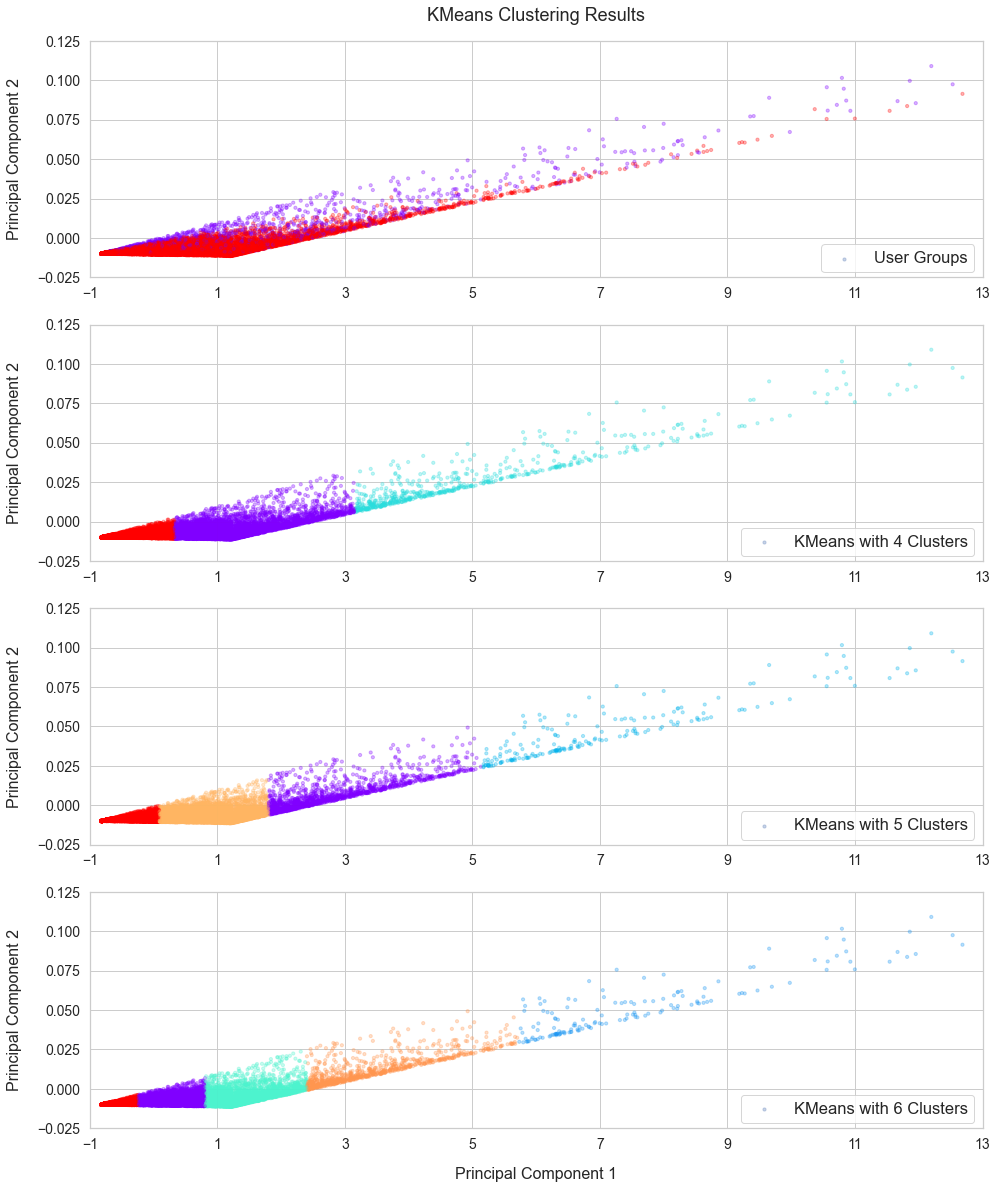

In [71]:
alpha_val = 0.3

x_min = -1.0
x_max = 12.0
d_x = 2.0

y_min = -0.025
y_max = 0.125
d_y = 0.025

legend_box_x = 1.0
legend_box_y = 0.175

plot_compare_clusters(X_pca, y, km_labels_4, km_labels_5, km_labels_6, 
                          figsize_x, figsize_y, x_min, x_max, d_x, y_min, y_max, d_y,
                          alpha_val, marker_size, legend_box_x, legend_box_y)

- Determine the proportional contribution of each cluster from the KMeans results

In [72]:
# create a data frame with the KMeans results

km_results = pd.DataFrame({'km_4':km_labels_4, 'km_5':km_labels_5, 'km_6':km_labels_6})

km_results.head()

,km_4,km_5,km_6
0,0,0,0
1,0,1,5
2,3,1,3
3,0,0,0
4,0,0,0


In [73]:
# print cluster contribution from each result

print('Four clusters - cluster contribution (%):')
print(round(km_results['km_4'].value_counts(normalize = True) * 100, 3))
print('\n')

print('Five clusters - cluster contribution (%):')
print(round(km_results['km_5'].value_counts(normalize = True) * 100, 3))
print('\n')

print('Six clusters - cluster contribution (%):')
print(round(km_results['km_6'].value_counts(normalize = True) * 100, 3))

Four clusters - cluster contribution (%):
0    73.964
3    23.304
2     2.729
1     0.004
Name: km_4, dtype: float64


Five clusters - cluster contribution (%):
0    69.162
1    23.529
4     6.401
3     0.904
2     0.004
Name: km_5, dtype: float64


Six clusters - cluster contribution (%):
0    61.220
5    20.305
3    13.855
1     3.911
4     0.704
2     0.004
Name: km_6, dtype: float64


### 5. Analysis of Modeling Results

### Possible user segmentation based on KMeans results:


- **Segmentation (A): Conservative target selection**
    - Users in Clusters 1 and 2 from KMeans results with four clusters 
  

- **Segmentation (B): Moderate target selection**
    - Users in Clusters 2, 3 and 4 from KMeans results with five clusters 
 

- **Segmentation (C): Optimistic target selection**
    - Users in Clusters 1, 2, 3 and 4 from KMeans results with six clusters

### Feature behavior comparison between Users 2 and Users 1 as determined by Segmentations (A), (B), and (C)

- Merge working data with km_results.

In [74]:
data_results = pd.concat([data, km_results], axis=1)

data_results.head(10)

,User_ID,Install_Date,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,Spend_App,Spend_VP,km_4,km_5,km_6
0,0,2020-04-01,1,89,12,-22,0,0,0,0,0,0
1,1,2020-04-01,1,511,33,-44,0,0,0,0,1,5
2,2,2020-04-06,2,1308,38,-44,74,-73,0,3,1,3
3,3,2020-04-03,1,2,3,-22,0,0,0,0,0,0
4,4,2020-04-03,1,74,3,-22,0,0,0,0,0,0
5,5,2020-04-07,1,126,11,-22,0,0,0,0,0,0
6,6,2020-04-06,1,25,5,-22,0,0,0,0,0,0
7,7,2020-04-06,1,553,44,-22,0,0,0,3,1,5
8,8,2020-04-03,1,626,29,-22,0,0,0,0,1,5
9,9,2020-04-04,1,0,6,0,0,0,0,0,0,0


- Keep only features relevant to the following analysis

In [75]:
data_results.columns

Index(['User_ID', 'Install_Date', 'User_Group', 'Active_Period', 'N_Sessions',
       'Spend_Points', 'Spend_Premium', 'Spend_App', 'Spend_VP', 'km_4',
       'km_5', 'km_6'],
      dtype='object')

In [76]:
data_results.drop(['Install_Date', 'Spend_App', 'Spend_VP'], axis = 1, inplace = True)

data_results.head()

,User_ID,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,km_4,km_5,km_6
0,0,1,89,12,-22,0,0,0,0
1,1,1,511,33,-44,0,0,1,5
2,2,2,1308,38,-44,74,3,1,3
3,3,1,2,3,-22,0,0,0,0
4,4,1,74,3,-22,0,0,0,0


- Create new columns 'Segmentation A', 'Segmentation B', 'Segmentation C' and fill with appropriate values accordingly.

In [77]:
# create columns and initialize to 'Non-Convert'

data_results[['Segmentation A', 'Segmentation B', 'Segmentation C']] = 'Non-Converts'

In [78]:
data_results.head(10)

,User_ID,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,km_4,km_5,km_6,Segmentation A,Segmentation B,Segmentation C
0,0,1,89,12,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
1,1,1,511,33,-44,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
2,2,2,1308,38,-44,74,3,1,3,Non-Converts,Non-Converts,Non-Converts
3,3,1,2,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
4,4,1,74,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
5,5,1,126,11,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
6,6,1,25,5,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
7,7,1,553,44,-22,0,3,1,5,Non-Converts,Non-Converts,Non-Converts
8,8,1,626,29,-22,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
9,9,1,0,6,0,0,0,0,0,Non-Converts,Non-Converts,Non-Converts


In [79]:
# replace the value from 'Non-Convets' to 'Converted' for all users 2 (user_2 list)

mask_user2 = data_results['User_ID'].isin(user_2)

data_results['Segmentation A'][mask_user2] = 'Converted'
data_results['Segmentation B'][mask_user2] = 'Converted'
data_results['Segmentation C'][mask_user2] = 'Converted'

In [80]:
data_results.head(10)

,User_ID,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,km_4,km_5,km_6,Segmentation A,Segmentation B,Segmentation C
0,0,1,89,12,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
1,1,1,511,33,-44,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
2,2,2,1308,38,-44,74,3,1,3,Converted,Converted,Converted
3,3,1,2,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
4,4,1,74,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
5,5,1,126,11,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
6,6,1,25,5,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
7,7,1,553,44,-22,0,3,1,5,Non-Converts,Non-Converts,Non-Converts
8,8,1,626,29,-22,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
9,9,1,0,6,0,0,0,0,0,Non-Converts,Non-Converts,Non-Converts


In [81]:
# assign 'Possible Converts' to 'Segmentation A', 'Segmentation B', 'Segmentation C' accodingly

# define a function to assign this value to different segmentations

def feat_values_assign(data, feat_assign, val_assign, feat_select, labels_select):
    # create a filter
    mask_select = (data['User_Group'] == 1) & (data[feat_select].isin(labels_select))
    
    # assign values using filter
    data[feat_assign][mask_select] = val_assign

In [82]:
# 'Segmentation A'

data = data_results

feat_assign = 'Segmentation A'
val_assign = 'Possible Converts'

feat_select = 'km_4'
labels_select = [1, 2]

feat_values_assign(data, feat_assign, val_assign, feat_select, labels_select)

In [83]:
# 'Segmentation B'

feat_assign = 'Segmentation B'

feat_select = 'km_5'
labels_select = [2, 3, 4]

feat_values_assign(data, feat_assign, val_assign, feat_select, labels_select)

In [84]:
# 'Segmentation C'

feat_assign = 'Segmentation C'

feat_select = 'km_6'
labels_select = [1, 2, 3, 4]

feat_values_assign(data, feat_assign, val_assign, feat_select, labels_select)

In [85]:
# review results

data_results.head(10)

,User_ID,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,km_4,km_5,km_6,Segmentation A,Segmentation B,Segmentation C
0,0,1,89,12,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
1,1,1,511,33,-44,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
2,2,2,1308,38,-44,74,3,1,3,Converted,Converted,Converted
3,3,1,2,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
4,4,1,74,3,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
5,5,1,126,11,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
6,6,1,25,5,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
7,7,1,553,44,-22,0,3,1,5,Non-Converts,Non-Converts,Non-Converts
8,8,1,626,29,-22,0,0,1,5,Non-Converts,Non-Converts,Non-Converts
9,9,1,0,6,0,0,0,0,0,Non-Converts,Non-Converts,Non-Converts


In [86]:
# examine few more results

data_results.iloc[10:20, :]

,User_ID,User_Group,Active_Period,N_Sessions,Spend_Points,Spend_Premium,km_4,km_5,km_6,Segmentation A,Segmentation B,Segmentation C
10,10,1,1457,147,-64,0,3,4,1,Non-Converts,Possible Converts,Possible Converts
11,11,1,1440,65,-44,21,3,4,3,Non-Converts,Possible Converts,Possible Converts
12,12,1,0,1,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
13,13,1,0,1,0,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
14,14,1,20,5,-64,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
15,15,1,1413,2,-64,0,3,1,3,Non-Converts,Non-Converts,Possible Converts
16,16,1,455,32,-44,9,0,1,5,Non-Converts,Non-Converts,Non-Converts
17,17,1,1,5,-22,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
18,18,1,0,2,0,0,0,0,0,Non-Converts,Non-Converts,Non-Converts
19,19,1,242,43,-123,0,0,0,5,Non-Converts,Non-Converts,Non-Converts


Here, we can see that the same user in Group 1 could be assigned 'Non-Convert' or 'Possible Convert' values based on the segmentation chosen.

- Obtain the user partitioning for the three segmentations

In [87]:
print('User Partitioning (%) - Segmentation A:')
print(round(data_results['Segmentation A'].value_counts(normalize = True)*100, 1))
print('\n')

print('User Partitioning (%) - Segmentation B:')
print(round(data_results['Segmentation B'].value_counts(normalize = True)*100, 1))
print('\n')

print('User Partitioning (%) - Segmentation C:')
print(round(data_results['Segmentation C'].value_counts(normalize = True)*100, 1))

User Partitioning (%) - Segmentation A:
Non-Converts         91.6
Converted             6.8
Possible Converts     1.6
Name: Segmentation A, dtype: float64


User Partitioning (%) - Segmentation B:
Non-Converts         88.2
Converted             6.8
Possible Converts     5.0
Name: Segmentation B, dtype: float64


User Partitioning (%) - Segmentation C:
Non-Converts         78.6
Possible Converts    14.7
Converted             6.8
Name: Segmentation C, dtype: float64


Depending on the segmentation chosen we have the following numbers of 'Possible Converts' in percentages:
- Segmentation A:  1.6
- Segmentation B:  5.0
- Segmentation C: 14.7

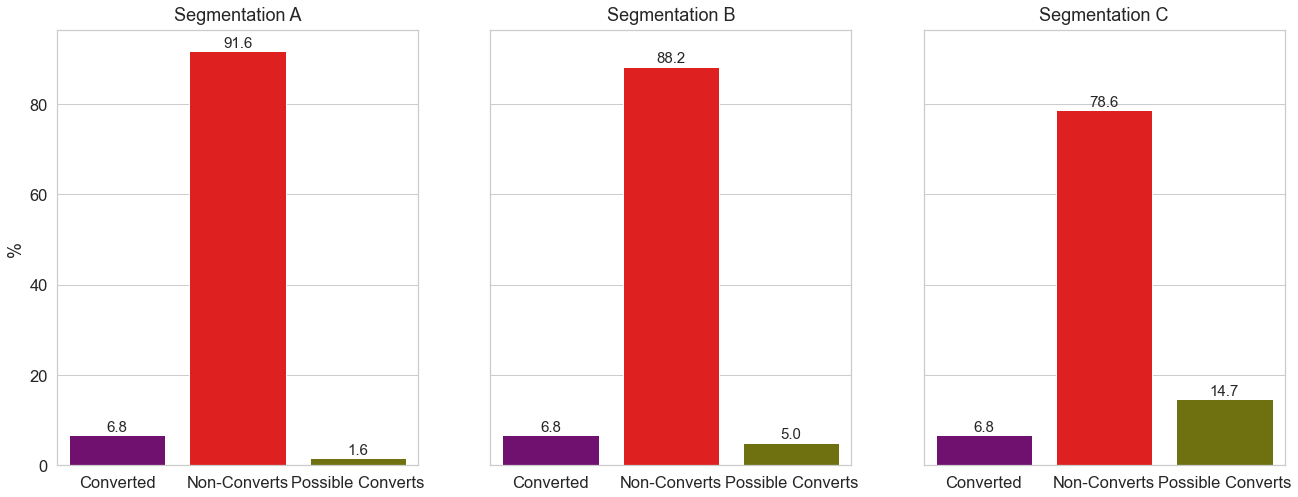

In [88]:
# visualize with bar plots

# use .sort_index(ascending=True) in value_counts to have the same order in all segmentations
count_a = data_results['Segmentation A'].value_counts(normalize = True).sort_index(ascending=True)*100
count_b = data_results['Segmentation B'].value_counts(normalize = True).sort_index(ascending=True)*100
count_c = data_results['Segmentation C'].value_counts(normalize = True).sort_index(ascending=True)*100

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize = (22,8))

sns.barplot(count_a.index, count_a.values, palette = 'brg', ax=ax1)
ax1.set_title('Segmentation A', pad = 10)
ax1.set_ylabel('%')
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

sns.barplot(count_b.index, count_b.values, palette = 'brg', ax=ax2)
ax2.set_title('Segmentation B', pad = 10)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


sns.barplot(count_c.index, count_c.values, palette = 'brg', ax=ax3)
ax3.set_title('Segmentation C', pad = 10)
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')



plt.show()

**Compare feature behavior vs Segmentation**

In order to observe the features values behavior in greater detail we will use violin plots. Unlike the box plot which represents the actual distribution of all data points, the violin plot features a kernel density estimation of the underlying values distribution. Because of this feature, the violin plot is more suitable for the comparative analysis here.

In [89]:
data_results.columns

Index(['User_ID', 'User_Group', 'Active_Period', 'N_Sessions', 'Spend_Points',
       'Spend_Premium', 'km_4', 'km_5', 'km_6', 'Segmentation A',
       'Segmentation B', 'Segmentation C'],
      dtype='object')

In [90]:
# define function to plot features violinplots

feat_name = 'Active_Period'

y_min = -250
y_max = 1750

def feat_violinplot(data_plot, feat_name, y_min, y_max):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize = (22,7))
    
    sns.violinplot(x='Segmentation A', y=feat_name, data=data_plot, palette = 'brg', ax=ax1)
    ax1.set_ylim(y_min, y_max)
    sns.violinplot(x='Segmentation B', y=feat_name, data=data_plot, palette = 'brg', ax=ax2)
    ax2.set_ylim(y_min, y_max)
    ax2.set_ylabel(' ')
    ax2.set_title(feat_name + ' vs. Segmentation', pad = 20, fontsize = 28)
    sns.violinplot(x='Segmentation C', y=feat_name, data=data_plot, palette = 'brg', ax=ax3)
    ax3.set_ylim(y_min, y_max)
    ax3.set_ylabel(' ')
    
    plt.show()

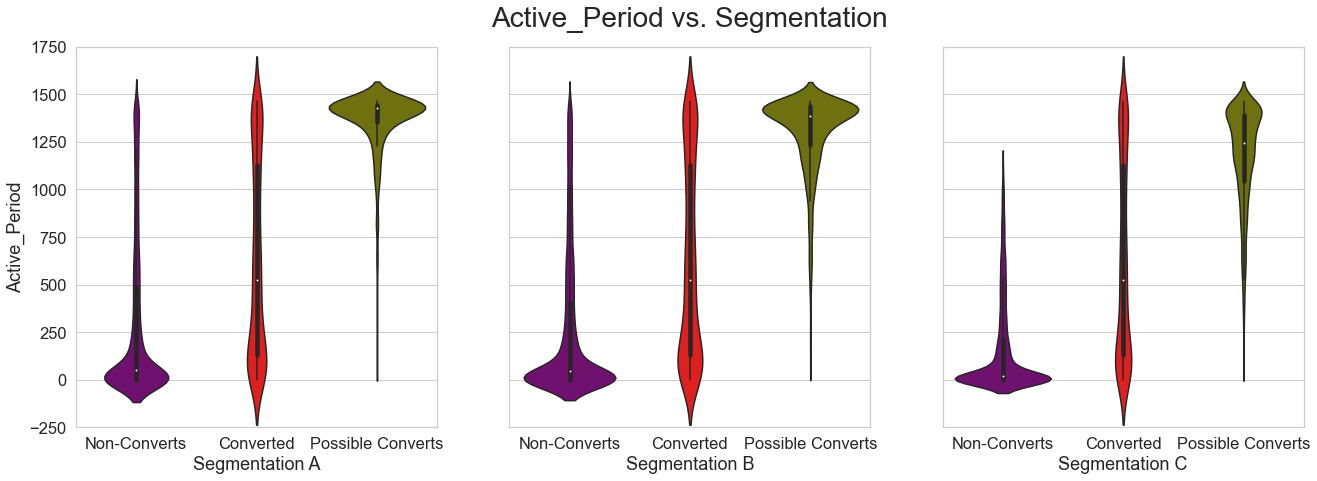

In [91]:
# plot 'Active_Period'

data_plot = data_results

y_min = -250
y_max = 1750
feat_name = 'Active_Period'

feat_violinplot(data_plot, feat_name, y_min, y_max)

The violin plot of the 'Active_Period' confirms our observation from the scatter plot in the EDA section regarding the existence of two clusterings at the 'Active_Period' low- and high-end.

It also appears that most of the users chosen by us as 'Possible Converts' belong to the high-end of the 'Active_Period'.

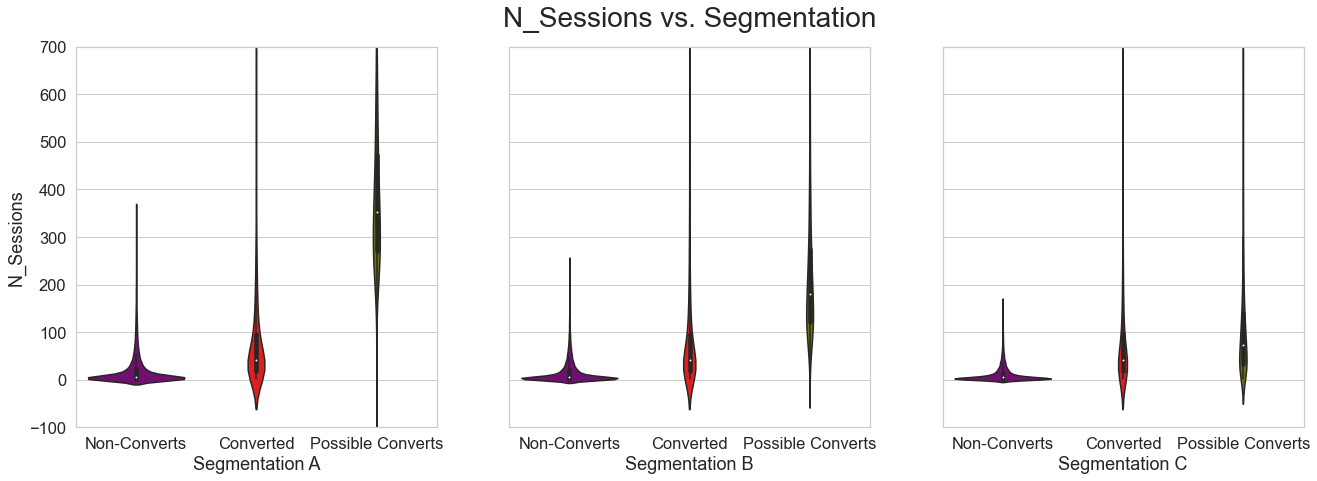

In [92]:
# plot 'N_Sessions'

y_min = -100
y_max = 700
feat_name = 'N_Sessions'

feat_violinplot(data_plot, feat_name, y_min, y_max)

Here, all categories show a single kernel in the value distribution. The users under the category 'Possible Converts' have the greatest overlap with the 'Converted' users.

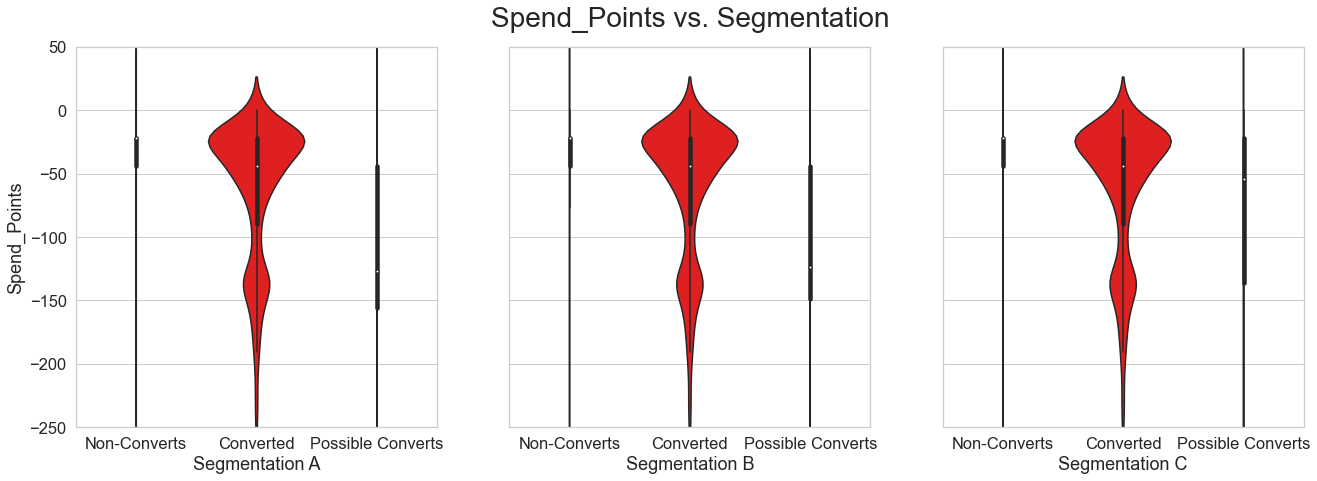

In [93]:
# plot 'Spend_Points'

y_min = -250
y_max = 50
feat_name = 'Spend_Points'

feat_violinplot(data_plot, feat_name, y_min, y_max)

Although, there are no clear kernel density estimations for the selected 'Non-Converts' and 'Possible Converts' users, in all three cases the 'Non-Converts' tend to have small absolute values, while the 'Possible Converts' cover a broader range of values with higher magnitude.

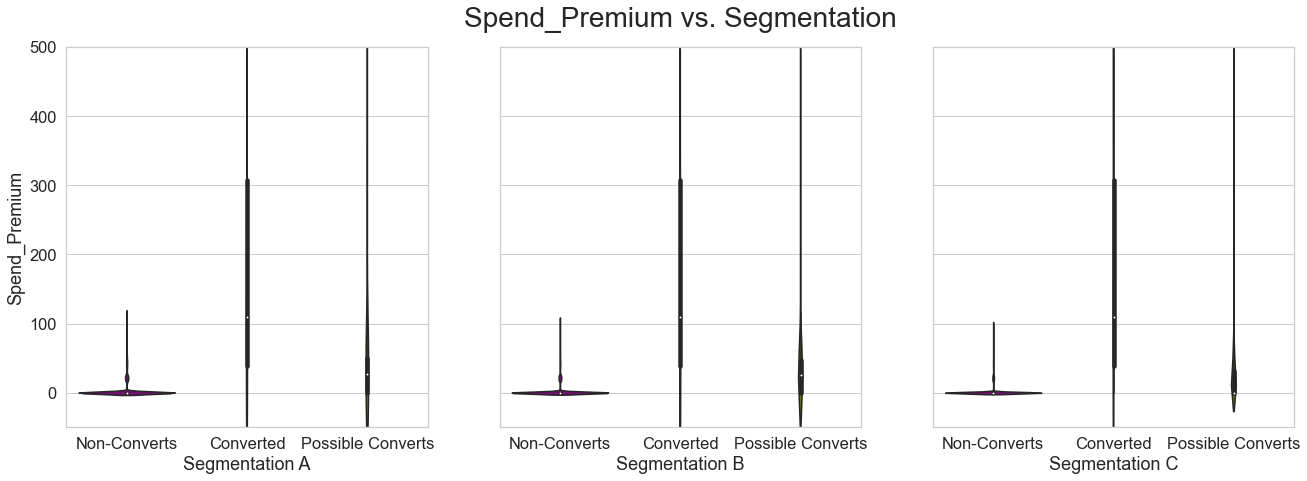

In [94]:
# plot 'Spend_Premium'

y_min = -50
y_max = 500
feat_name = 'Spend_Premium'

feat_violinplot(data_plot, feat_name, y_min, y_max)

Here, 'Non-Converts' have practically zero spending.  'Possible Converts' also have low spending values. Both groups have almost no overlap with 'Converted' users.

### 6. Promotion Targeting Strategy Optimization

In this section, we work on optimizing the possible profit for the company based on estimated converted user ROI and conversion rate for the 'Possible Converts' depending on the segmentation chosen.


**Key parameters and parameter ranges*:**
- Number of targeted users 
    - Segmentation A - n = (0.016 * 22576) = 361
    - Segmentation B - n = (0.050 * 22576) = 1128
    - Segmentation C - n = (0.147 * 22576) = 3318
- Average ROI per converted user over average user lifetime 
    - Same for all segmentations - 200, 500, 10000, 20000  (returns USD 3, 6, 11,  21 for USD 1 invested) 
- Targeted users estimated conversion rate
    - Segmentation A - 0.50-0.90 (This is a reasonable estimated range for users who are likely to convert)
    - Segmentation B - 0.20-0.60 (This is the approximate estimated range assuming that the conversion rate range for the added users is 0.1-0.5) 
    - Segmentation C - 0.05-0.30 (This is the approximate estimated range assuming that the conversion rate range for the added users is 0.0-0.1)
    
(*) Note that the ROI and User Conversion Rate values provided here are merely examples to demonstrate the process of selecting the targeted users for optimal profit strategy. For actual selection values based on the particular company history and experience should be used.

In [95]:
# number of users targeted depending on segmentation chosen --> make sure that these are integers

n_target = [int(0.016 * 22576), int(0.050 * 22576), int(0.147 * 22576)]
print(n_target)

[361, 1128, 3318]


In [96]:
# conversion rate range - Segmentation A
cr_a = np.arange(5, 10)/10
print(cr_a)

[0.5 0.6 0.7 0.8 0.9]


In [97]:
# conversion rate range - Segmentation B
cr_b = np.arange(2, 7)/10
print(cr_b)

[0.2 0.3 0.4 0.5 0.6]


In [98]:
# conversion rate range - Segmentation C
cr_c = np.arange(5, 30, 5)/100
print(cr_c)

[0.05 0.1  0.15 0.2  0.25]


In [99]:
# define a function to calculate the net profit for each segmentation depending on average converted user ROI
roi = 200
y_coeff = 1000 # will plot profit in thousands
y_coeff_str = 'Thousands'

def calculate_net_profit(roi, y_coeff, y_coeff_str, n_target, cr_a, cr_b, cr_c):
    # calcualte net profit for each segementation
    profit_a = (n_target[0]*cr_a*roi) - (n_target[0]*(1-cr_a)*100)
    profit_b = (n_target[1]*cr_b*roi) - (n_target[1]*(1-cr_b)*100)
    profit_c = (n_target[2]*cr_c*roi) - (n_target[2]*(1-cr_c)*100)
    
    # plot results
    plt.figure(figsize = (16, 8))
    plt.plot(cr_a, profit_a/y_coeff, 'k--', lw = 2, marker = 'o', ms = 14, mfc = 'green', label = 'Segmenetation A')
    plt.plot(cr_b, profit_b/y_coeff, 'k--', lw = 2, marker = 'd', ms = 14, mfc = 'blue', label = 'Segmenetation B')
    plt.plot(cr_c, profit_c/y_coeff, 'k--', lw = 2, marker = 's', ms = 12, mfc = 'red', label = 'Segmenetation C')
    plt.xlim(0, 1)
    plt.xticks(np.arange(11)/10)
    plt.xlabel('User Conversion Rate')
    plt.ylabel("Total Net Profit in $" + y_coeff_str)
    plt.title(f"Total Net Profit for $100 Spent on Promotion per User: Converted User Average ROI = {roi}%", pad = 20)
    plt.legend()
    plt.show()

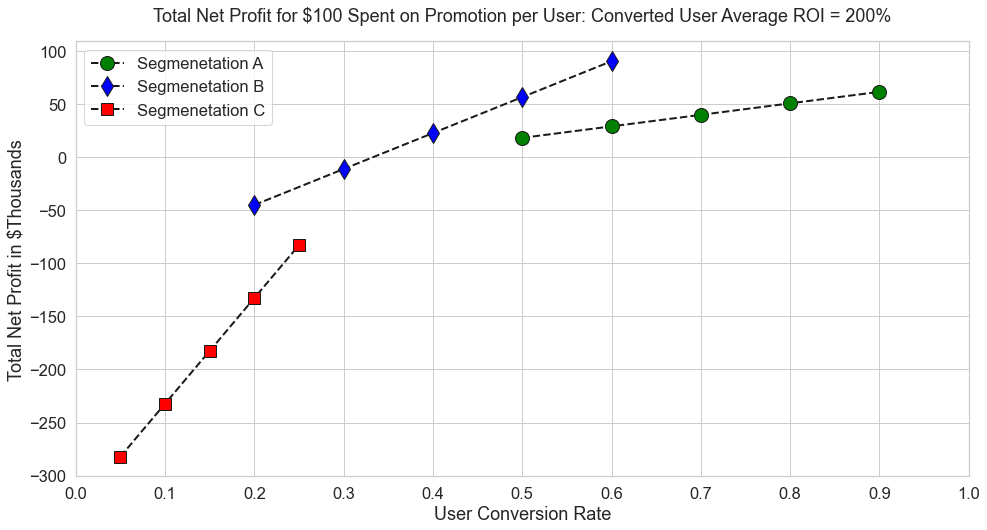

In [100]:
# roi = 200
calculate_net_profit(200, y_coeff, y_coeff_str, n_target, cr_a, cr_b, cr_c)

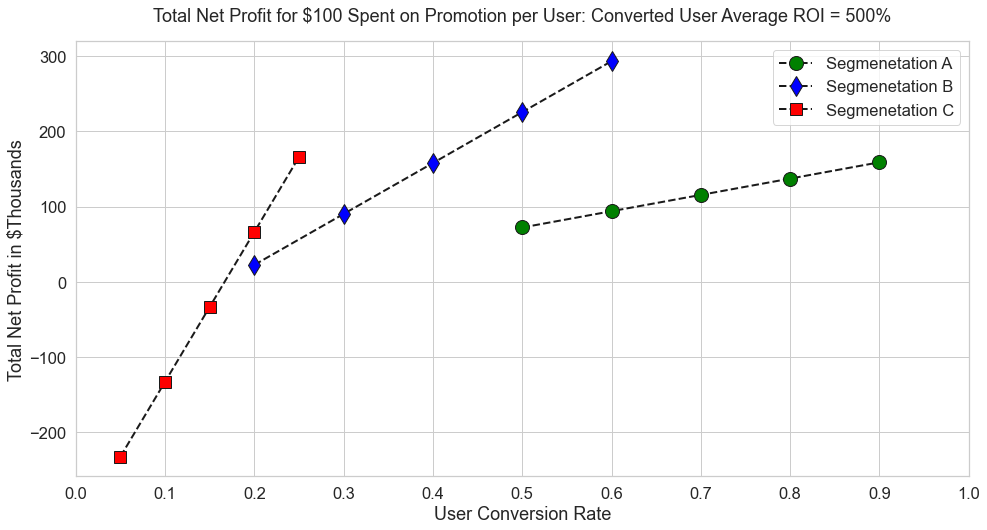

In [101]:
# roi = 500
calculate_net_profit(500, y_coeff, y_coeff_str, n_target, cr_a, cr_b, cr_c)

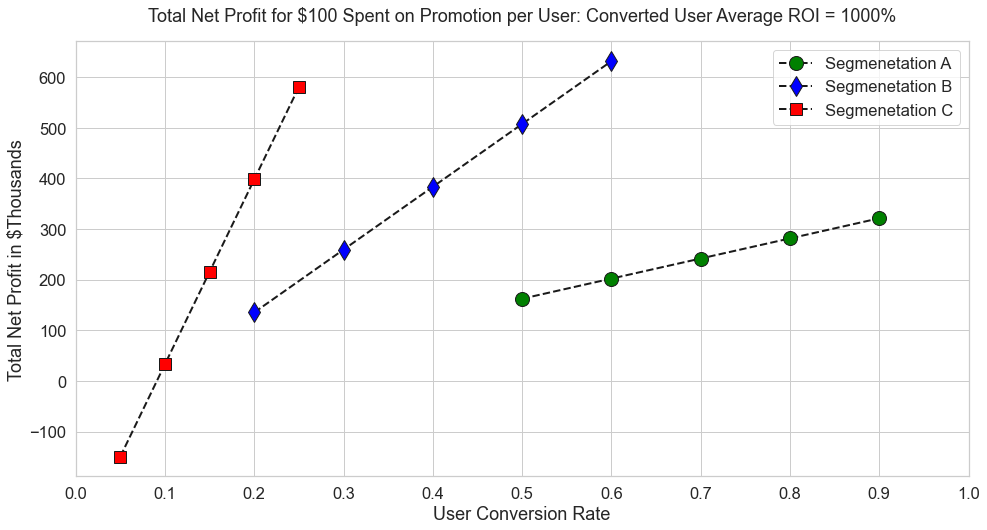

In [102]:
# roi = 1000
calculate_net_profit(1000, y_coeff, y_coeff_str, n_target, cr_a, cr_b, cr_c)

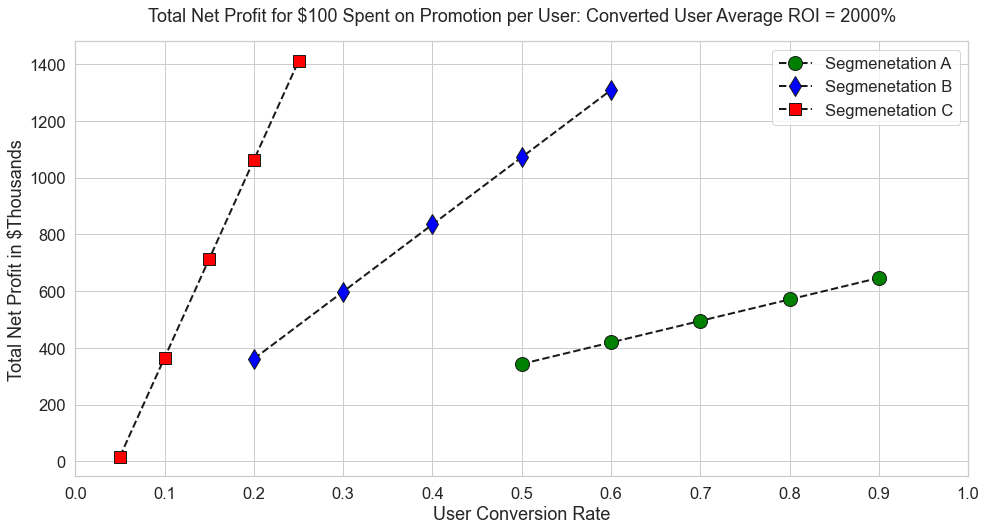

In [103]:
# roi = 2000
calculate_net_profit(2000, y_coeff, y_coeff_str, n_target, cr_a, cr_b, cr_c)

### Summary of results and recommendation for promotion targeting strategy

- **Segmentation A:**
    - Since the conversion rate selected by us is greater or equal to 50%, targeting this user segment never results in losses for the company.
    - However, because of the very small number of users in this segment it does not have the potential for large gains even at high ROI of converted users.


- **Segmentation C:**
    - Because of the small conversion rates and the large number of users targeted, this segment leads to net losses at low and moderate ROI.
    - At very high ROI values its potential for high profit is realized only at the high-end of the conversion rate range for this segment.


- **Segmentation B:**
    - This is the user segment which appears to be optimal for promotional targeting.
    - At low ROI, it could yield losses at the low end of its conversion rate. However, such low ROI value is not realistic and should not be given great weight in the decision-making process.
    - At moderate and high ROI values, Segment B outperforms both Segments A and C when comparing the corresponding ends of their conversion rate ranges.

**Therefore, our recommendation is to target Segment B for promotion with expectations for maximum profit in almost all possible scenarios.**